<a href="https://colab.research.google.com/github/Clamarche/Intersect.Beta/blob/develop/securePhoto_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the notebook of securePhoto.
## This python3 notebook helps to construct the project in homogenized interface

* No Need to configure anything
* Ready to test system
* Possibility to comment the code and add more example

NOTE :

_A command beginning with "!" enable shell command._



Importing all the necessary package.

In [48]:
!pip install pillow
!pip install numpy
!pip install matplotlib

Make sure that every package is installed in the notebook.

In [0]:
# To read picture
import PIL as pil
import matplotlib.image as img
# To create array
import numpy as np
# To create picture 
import matplotlib.pyplot as plt
# To display inside the notebook
from IPython.display import Image, display

Creating the image to test the principle

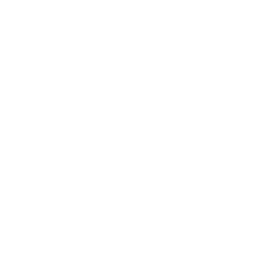

'white (256x256)'

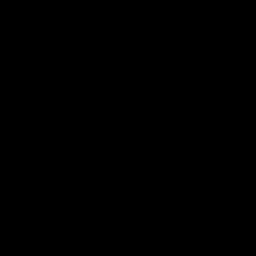

'black (256x256)'

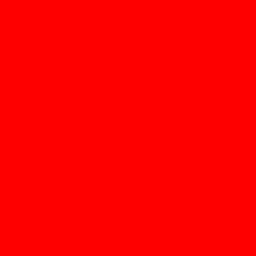

'red (256x256)'

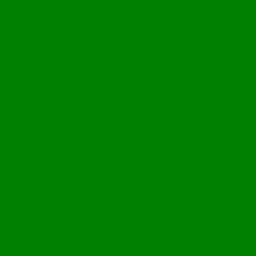

'green (256x256)'

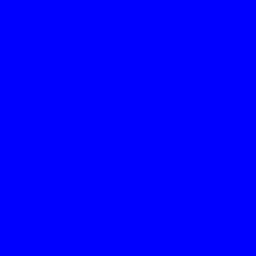

'blue (256x256)'

In [50]:
# Create the test picture
# Content inside /content/ repository
color_palette = ['white', 'black', 'red', 'green', 'blue']
images = {}
for color in color_palette:
  images[color] = pil.Image.new('RGB', (256, 256), color=color)
  images[color].save(color+'256.png')

# Display the test picture
for image in images:
  display(Image("%s256.png"%(image)))
  display("%s (256x256)"%(image))

Checking the pixel of the images.

In [51]:
for color in color_palette:
  print(color)
  pixels = pil.Image.open(color+'256.png').load()

  for i in range(1):
    print(pixels[0, i])

white
(255, 255, 255)
black
(0, 0, 0)
red
(255, 0, 0)
green
(0, 128, 0)
blue
(0, 0, 255)


Checking how to create a picture by creating a true green.

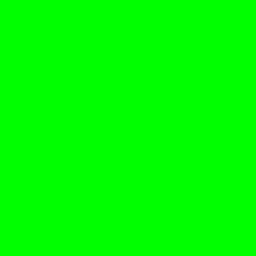

'true_green (256x256)'

In [52]:
data = np.zeros((256, 256, 3), dtype=np.uint8)
for i in range(256):
  for j in range(256):
    data[i, j] = [0, 255, 0]


image = pil.Image.fromarray(data)
image.save('true_green256.png')

display(Image('true_green256.png'))
display("true_green (256x256)")

Take the data from a picture and transfer it into an array.

In [0]:
def transfer2array(name_picture):
  pixels = pil.Image.open(name_picture)
  size_x, size_y= pixels.size
  pixels = pixels.load()
  
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      data[i, j] = pixels[i, j]
  return data

Display the ascii value of string/text.

In [54]:
def echo_value_text(text):
  #Display the value
  value = []
  text_array = []
  for i in range(len(text)):
    value.append(ord(text[i]))
    text_array.append(text[i])
  print(text_array)
  print(value)
  return
echo_value_text('Hello world!')

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', '!']
[72, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100, 33]


Create image from array

In [0]:
def create_image(array, name_picture):
  image = pil.Image.fromarray(array)
  image.save(name_picture+'.png')
  display(Image(name_picture+'.png'))
  return

Try to modify the value by adding the blue with the red.

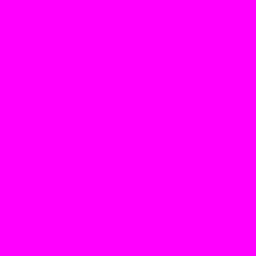

In [73]:
def add_template(picture_name, template_name, result_name='result'):
  picture = transfer2array('blue256.png')
  template = transfer2array('red256.png')

  new = np.add(picture, template)
  create_image(new, result_name)
add_template('blue256', 'red256', 'pink256')

Creating a random template

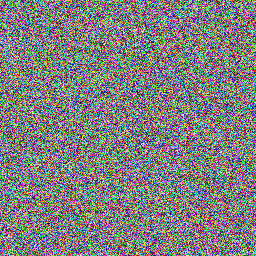

In [59]:
def random_template(size_x, size_y):
  """
  size_x : size for the x axis
  size_y : size for the y axis
  Create a template and save it
  :return None: 
  """
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      data[i, j] = np.multiply(np.random.rand(1, 3), 255)
      
  image = pil.Image.fromarray(data)
  image.save('random_template.png')
  display(Image('random_template.png'))
  return
random_template(256, 256)

Create a template from a text

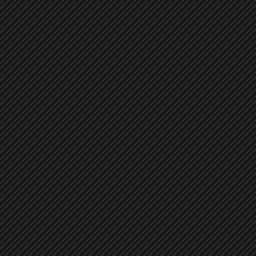

'Hello World! - template'

In [71]:
def text_template(text, size_x, size_y):
  data = np.zeros((size_x, size_y, 3), dtype=np.uint8)
  for i in range(size_x):
    for j in range(size_y):
      data[i, j] = value2pixel(ord(text[(i+j)%len(text)]))

  image = pil.Image.fromarray(data)
  image.save('text_template.png')
  display(Image('text_template.png'))
  return
text_template('Hello World!', 256, 256)
display("Hello World! - template")

Create a divsion of the value to minimize the modification.

In [61]:
def value2pixel(value):
  pixelRG=value//3
  pixelB=pixelRG+value%3
  return [pixelRG, pixelRG, pixelB]
print(value2pixel(62))

[20, 20, 22]


In [62]:
def pixel2value(pixel):
  return pixel[0]+pixel[1]+pixel[2]
print(pixel2value(value2pixel(62)))

62
